In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pymongo import MongoClient
from collections import defaultdict
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [46]:
plt.style.use('seaborn-v0_8-paper')
pt = 1./72.27
fig_width = 239 * pt
aspect_ratio = (1 + 8 ** 0.5) / 2
plt.rcParams["figure.figsize"] = (fig_width, fig_width/aspect_ratio)
plt.rcParams["savefig.bbox"] = "tight"
sns.set_theme(style='whitegrid', context='paper', rc={'axes.facecolor': 'white', 'figure.figsize': (fig_width, fig_width/aspect_ratio)})
# sns.set_theme(style='whitegrid', context='paper', rc={'savefig.transparent': True, 'figure.figsize': (fig_width, fig_width/aspect_ratio), 'axes.labelsize': 14})

colors = ["#00a1de", "#009b3a", "#c60c30", "#f9461c", "#532A92"]

In [2]:
client = MongoClient()
game_responses = client.enery_survey.game_responses

In [3]:
game_responses.count_documents({})

325

In [8]:
#### DO NOT UNCOMMENT!!!!! #####
# deleted_response = game_responses.delete_many({})
# deleted_response

DeleteResult({'n': 31, 'ok': 1.0}, acknowledged=True)

In [3]:
machine_list = {
    "machine1": { 'id': 'machine1', 'text': 'Machine 1', 'max_power': 20},
    "machine2": { 'id': 'machine2', 'text': 'Machine 2', 'max_power': 40},
    "machine3": { 'id': 'machine3', 'text': 'Machine 3', 'max_power': 40},
    "machine4": { 'id': 'machine4', 'text': 'Machine 4', 'max_power': 30}
}

with open("static/sample_jobs.json") as fp:
    jobs = json.load(fp)
    
def energy_cost(machine, job):
    return ((machine_list[machine]['max_power'] * job["resources"][machine]["runtime"]) + job["resources"][machine]["energy"]) / 2

In [4]:
min_time = sum(min(machine['runtime'] for machine in job["resources"].values()) for job in jobs)
time_by_machine = defaultdict(int)
for job in jobs:
    machine = min(job["resources"].keys(), key=lambda m : job["resources"][m]["runtime"])
    time_by_machine[machine] += job["resources"][machine]["runtime"]
    
print(min_time)
print(time_by_machine)

160
defaultdict(<class 'int'>, {'machine1': 82, 'machine3': 74, 'machine2': 4})


In [5]:
min_energy = sum(min(machine['energy'] for machine in job["resources"].values()) for job in jobs)
time_by_machine = defaultdict(int)
cost = 0
for job in jobs:
    machine = min(job["resources"].keys(), key=lambda m : job["resources"][m]["energy"])
    time_by_machine[machine] += job["resources"][machine]["runtime"]
    cost += energy_cost(machine, job)
    
print(min_energy)
print(cost)
print(time_by_machine)

1476.3999999999999
3008.2000000000003
defaultdict(<class 'int'>, {'machine1': 227})


In [6]:
min_cost = sum(min(energy_cost(machine, job) for machine in job["resources"]) for job in jobs)

time_by_machine = defaultdict(int)
for job in jobs:
    machine = min(job["resources"].keys(), key=lambda m : energy_cost(m, job))
    time_by_machine[machine] += job["resources"][machine]["runtime"]
    
print(min_cost)
print(time_by_machine)

2866.4500000000003
defaultdict(<class 'int'>, {'machine1': 152, 'machine3': 29})


In [7]:
energy_allocation = (200/160) * min_cost
energy_allocation

3583.0625000000005

In [47]:
# responses = game_responses.find({"plays": {"$ne": 1}})
# df = pd.DataFrame(responses)
# df.to_csv("game_responses.csv")
df = pd.read_csv("game_responses.csv", index_col=0)

In [48]:
df

,_id,jobs_completed,timeLeft,total_allocation,allocation,total_energy,total_runtime,scheduling_decisions,job_idx,userID,plays,visits,group,startTime,gameTime,version
0,66be38d1217dee6c11eced47,11,4,200,77.000000,2123.385714,123,"{'7': {'machine1': ['10', 1], 'machine2': ['13...",16,1on9b7a,2,2,2,1723742065812,329560,1
1,66be39933bebf2876408dc66,9,22,3000,0.157143,2159.685714,118,"{'30': {'machine1': ['9', 0.8888888888888888],...",14,1on9b7a,3,3,2,1723742419420,190058,3
2,66be3a39217dee6c11eced48,16,0,200,29.000000,3078.900000,171,"{'1': {'machine1': ['19', 1]}, '2': {'machine2...",20,1on9b7a,4,4,2,1723742626191,151298,1
3,66bf707b09f21551ff542cfd,12,12,200,8.000000,3518.994242,192,"{'13': {'machine1': ['8', 0.05], 'machine2': [...",17,19abi9c,2,2,0,1723822133887,63355,1
4,66bf70a2ddc4307faabac4a7,9,11,200,4.000000,3954.324242,196,"{'20': {'machine1': ['7', 1], 'machine2': ['8'...",14,19abi9c,3,3,0,1723822209789,24594,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,66dad6b23bebf2876408dcaf,11,7,200,2.000000,3515.735584,198,"{'10': {'machine1': ['10', 0.3333333333333333]...",16,1l3my9v,2,2,0,1725616719133,1086099,1
203,66dad9003bebf2876408dcb0,19,4,200,9.000000,3533.000000,191,"{'4': {}, '10': {'machine2': ['15', 1]}, '11':...",20,1l3my9v,3,3,0,1725617848162,581944,2
204,66df03dd217dee6c11eced9b,16,2,3000,16.350000,2127.300000,125,"{'3': {'machine1': ['19', 1]}, '7': {'machine1...",20,19vqkwl,2,2,5,1725891059130,487805,3
205,66df0540217dee6c11eced9c,19,0,200,14.000000,3511.400000,186,"{'1': {'machine3': ['9', 1]}, '6': {'machine3'...",20,19vqkwl,3,3,5,1725891560985,343574,2


In [49]:
df.userID.nunique()

90

Text(0.5, 0, 'Real Time Taken (Minutes)')

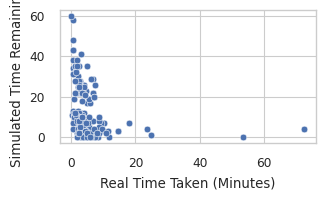

In [50]:
df["gameTimeMin"] = df["gameTime"] /(1e3 * 60)
fig, ax = plt.subplots(1,1)
sns.scatterplot(data=df, x="gameTimeMin", y="timeLeft", ax=ax)
ax.set_ylabel("Simulated Time Remaining")
ax.set_xlabel("Real Time Taken (Minutes)")

In [51]:
df = df[df["gameTimeMin"] > 1]
df["energy_per_job"] = df["total_energy"] / df["jobs_completed"]
df["energy_per_time"] = df["total_energy"] / df["total_runtime"]
df.shape

/tmp/ipykernel_646/2225852331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["energy_per_job"] = df["total_energy"] / df["jobs_completed"]
/tmp/ipykernel_646/2225852331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["energy_per_time"] = df["total_energy"] / df["total_runtime"]


(192, 19)

/tmp/ipykernel_646/1079387758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="version", y="total_energy", order=["1","2","3"], ax=ax, palette=colors)
/tmp/ipykernel_646/1079387758.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.violinplot(data=df, x="version", y="total_energy", order=["1","2","3"], ax=ax, palette=colors)


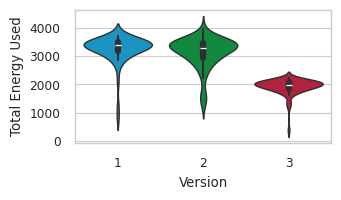

In [52]:
fig,ax = plt.subplots(1,1)
sns.violinplot(data=df, x="version", y="total_energy", order=["1","2","3"], ax=ax, palette=colors)
ax.set_xlabel("Version")
ax.set_ylabel("Total Energy Used")
plt.savefig("figures/game_total_energy.pdf")
# plt.savefig("figures/game_total_energy_talk.png")

In [53]:
display(df[df["version"] == 1]["total_energy"].describe())
display(df[df["version"] == 2]["total_energy"].describe())
display(df[df["version"] == 3]["total_energy"].describe())
display(stats.ttest_ind(df[df["version"] == 1]["total_energy"], df[df["version"] == 2]["total_energy"]))
display(stats.ttest_ind(df[df["version"] == 1]["total_energy"], df[df["version"] == 3]["total_energy"]))
display(stats.ttest_ind(df[df["version"] == 2]["total_energy"], df[df["version"] == 3]["total_energy"]))

count      63.000000
mean     3262.544559
std       497.134247
min       809.900000
25%      3206.602500
50%      3393.800535
75%      3497.816815
max      3736.712054
Name: total_energy, dtype: float64

count      62.000000
mean     3142.400934
std       546.484256
min      1268.400000
25%      2960.500000
50%      3293.653351
75%      3477.772917
max      3959.892091
Name: total_energy, dtype: float64

count      67.000000
mean     1928.516872
std       277.419640
min       370.100000
25%      1851.169559
50%      1981.483333
75%      2093.775566
max      2215.990909
Name: total_energy, dtype: float64

Ttest_indResult(statistic=1.2861206282093651, pvalue=0.2008167296086517)

Ttest_indResult(statistic=19.039969314094815, pvalue=3.727013129333428e-39)

Ttest_indResult(statistic=16.083077989336413, pvalue=2.0018894585596637e-32)

/tmp/ipykernel_646/1967740162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="version", y="jobs_completed", order=[1,2,3], ax=ax, palette=colors)
/tmp/ipykernel_646/1967740162.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.violinplot(data=df, x="version", y="jobs_completed", order=[1,2,3], ax=ax, palette=colors)


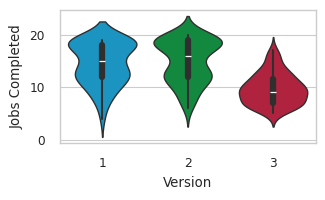

In [54]:
fig,ax = plt.subplots(1,1)
sns.violinplot(data=df, x="version", y="jobs_completed", order=[1,2,3], ax=ax, palette=colors)
ax.set_xlabel("Version")
ax.set_ylabel("Jobs Completed")
plt.savefig("figures/game_jobs_completed.pdf")
# plt.savefig("figures/game_jobs_completed_talk.png")

In [55]:
display(df[df["version"] == 1]["jobs_completed"].describe())
display(df[df["version"] == 2]["jobs_completed"].describe())
display(df[df["version"] == 3]["jobs_completed"].describe())
display(stats.ttest_ind(df[df["version"] == 1]["jobs_completed"], df[df["version"] == 2]["jobs_completed"]))
display(stats.ttest_ind(df[df["version"] == 1]["jobs_completed"], df[df["version"] == 3]["jobs_completed"]))
display(stats.ttest_ind(df[df["version"] == 2]["jobs_completed"], df[df["version"] == 3]["jobs_completed"]))

count    63.000000
mean     14.476190
std       3.995389
min       4.000000
25%      12.000000
50%      15.000000
75%      18.000000
max      19.000000
Name: jobs_completed, dtype: float64

count    62.000000
mean     14.887097
std       4.020867
min       6.000000
25%      12.000000
50%      16.000000
75%      19.000000
max      20.000000
Name: jobs_completed, dtype: float64

count    67.000000
mean      9.686567
std       2.919158
min       5.000000
25%       7.000000
50%       9.000000
75%      11.500000
max      17.000000
Name: jobs_completed, dtype: float64

Ttest_indResult(statistic=-0.5730880496252491, pvalue=0.5676313092764956)

Ttest_indResult(statistic=7.8375078686067505, pvalue=1.5507776426703238e-12)

Ttest_indResult(statistic=8.451121179172661, pvalue=5.753422091040446e-14)

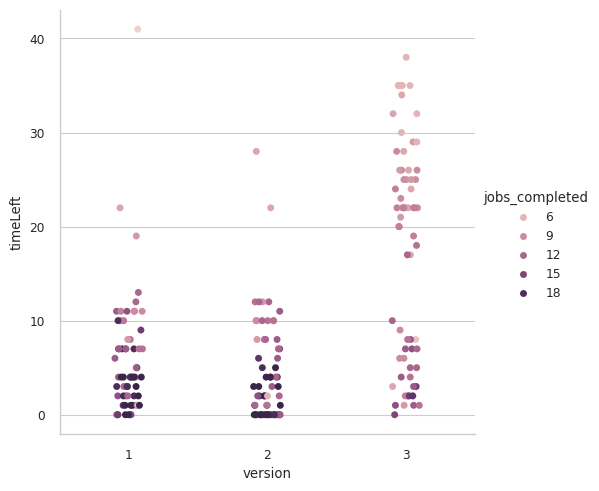

In [56]:
sns.catplot(data=df, x="version", y="timeLeft", order=["1","2","3"], hue="jobs_completed")

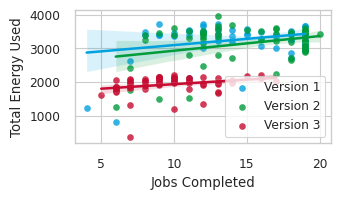

In [57]:
fig,ax = plt.subplots(1,1)
# sns.scatterplot(data=df, x="jobs_completed", y="energy_per_job", hue="version", ax=ax)
sns.regplot(data=df[df["version"] == 1], x="jobs_completed", y="total_energy", color=colors[0], label="Version 1", ax=ax)
sns.regplot(data=df[df["version"] == 2], x="jobs_completed", y="total_energy", color=colors[1], label="Version 2", ax=ax)
sns.regplot(data=df[df["version"] == 3], x="jobs_completed", y="total_energy", color=colors[2], label="Version 3",  ax=ax)
plt.legend(loc="lower right")
ax.set_xlabel("Jobs Completed")
ax.set_ylabel("Total Energy Used")
plt.savefig("figures/energy_used_by_jobs_completed.pdf")
# plt.savefig("figures/energy_used_by_jobs_completed_talk.png")

In [19]:
model = ols('total_energy ~ version + jobs_completed', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_energy   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     150.8
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           7.20e-40
Time:                        11:37:40   Log-Likelihood:                -1453.6
No. Observations:                 192   AIC:                             2913.
Df Residuals:                     189   BIC:                             2923.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3128.2952    181.802     17.207      0.000    2769.673    3486.917
version         -538.1142     46.725    -11.517      0.000    -630.284    -445.945
jobs_completed    55.4490      8.838      6.274      0.000      38.015      72.883
==============================================================================
Omnibus:                       32.071   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.996
Skew:                          -0.763   Prob(JB):                     6.32e-16
Kurtosis:                       5.534   Cond. No.                         75.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
stats.ttest_ind(df[df["version"] == "1"]["energy_per_job"], df[df["version"] == "2"]["energy_per_job"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [21]:
stats.ttest_ind(df[df["version"] == "1"]["energy_per_job"], df[df["version"] == "3"]["energy_per_job"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [22]:
stats.ttest_ind(df[df["version"] == "2"]["energy_per_job"], df[df["version"] == "3"]["energy_per_job"])

Ttest_indResult(statistic=nan, pvalue=nan)

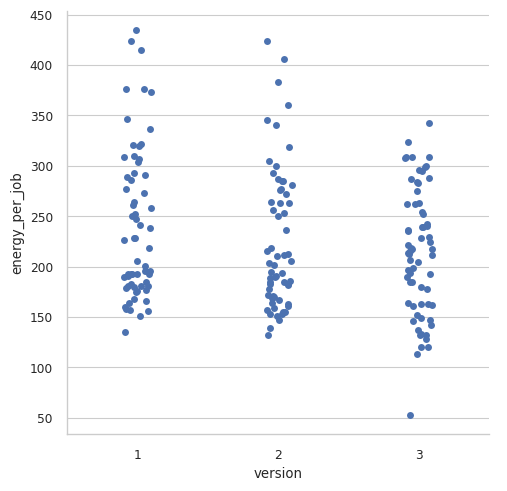

In [23]:
sns.catplot(data=df, x="version", y="energy_per_job", order=["1","2","3"])

In [24]:
stats.ttest_ind(df[df["version"] == "1"]["energy_per_time"], df[df["version"] == "3"]["energy_per_time"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [25]:
stats.ttest_ind(df[df["version"] == "2"]["energy_per_time"], df[df["version"] == "3"]["energy_per_time"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [26]:
play_2 = df[df["plays"] == 2].set_index("userID")
play_3 = df[df["plays"] == 3].set_index("userID")
play_3 = play_3[["version", "jobs_completed", "total_energy", "energy_per_job"]]
within_subsets = play_2.join(play_3, how="inner", rsuffix="_v2")

In [27]:
within_subsets["energy_change"] = within_subsets["total_energy_v2"] - within_subsets["total_energy"]
within_subsets["energy_per_job_change"] = within_subsets["energy_per_job_v2"] - within_subsets["energy_per_job"]

<Axes: xlabel='group', ylabel='energy_change'>

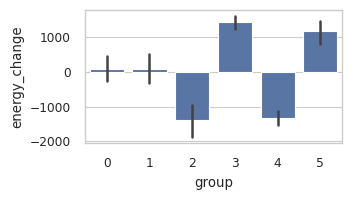

In [28]:
sns.barplot(data=within_subsets, x="group", y="energy_change")

<Axes: xlabel='group', ylabel='energy_per_job_change'>

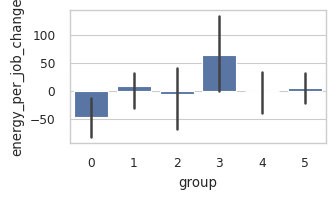

In [29]:
sns.barplot(data=within_subsets, x="group", y="energy_per_job_change", errorbar="ci")

In [30]:
group_map = {
    0: "v1 to v2",
    1: "v1 to v2",
    2: "v1 to v3",
    3: "v1 to v3",
    4: "v2 to v3",
    5: "v2 to v3"
}

within_subsets["group_adj"] = within_subsets["group"].apply(lambda x : group_map[x])
within_subsets["energy_change_adj"] = within_subsets[["group", "energy_change"]].apply(lambda x : x[1] if x[0] % 2 == 0 else (-1*x[1]), axis=1)
within_subsets["energy_per_job_change_adj"] = within_subsets[["group", "energy_per_job_change"]].apply(lambda x : x[1] if x[0] % 2 == 0 else (-1*x[1]), axis=1)

Text(0, 0.5, 'Change in Average Energy Used')

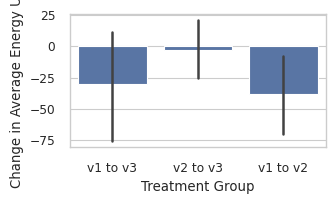

In [31]:
fig, ax = plt.subplots(1,1)
sns.barplot(data=within_subsets, x="group_adj", y="energy_per_job_change_adj", ax=ax)
ax.set_xlabel("Treatment Group")
ax.set_ylabel("Change in Average Energy Used")

In [32]:
stats.ttest_1samp(within_subsets[within_subsets["group_adj"] == "v1 to v3"]["energy_per_job_change_adj"], popmean=0)

TtestResult(statistic=-1.31943733690129, pvalue=0.205593233785188, df=16)

In [33]:
stats.ttest_1samp(within_subsets[within_subsets["group_adj"] == "v1 to v2"]["energy_per_job_change_adj"], popmean=0)

TtestResult(statistic=-2.336442799154148, pvalue=0.030574882351027975, df=19)

In [34]:
within_subsets.shape

(58, 27)

In [35]:
def is_out_of_allocation(user):
    job_remaining = [True for j in jobs]
    for timestep, decisions in user.scheduling_decisions.items():
        for machine, job_prop in decisions.items():
            if job_prop[1] == 1:
                job_remaining[int(job_prop[0])] = False
    
    machines_available = set(machine_list.keys())
    for timestep, decisions in user.scheduling_decisions.items():
        for machine, job_prop in decisions.items():
            if job_prop[1] != 1:
                machines_available.remove(machine)
        break
        
    for job, remaining in zip(jobs, job_remaining):
        if remaining:
            # TODO: Check if machine is available
            for machine, resources in job["resources"].items():
                if machine not in machines_available:
                    break
                    
                if user["version"] != '3':
                    if resources["runtime"] < user["allocation"]:
                        return False
                else:
                    if energy_cost(machine, job) < user["allocation"]:
                        return False
            
    return True

def is_out_of_time(user):
    job_remaining = [True for j in jobs]
    for timestep, decisions in user.scheduling_decisions.items():
        for machine, job_prop in decisions.items():
            if job_prop[1] == 1:
                job_remaining[int(job_prop[0])] = False
    
    machines_available = set(machine_list.keys())
    for timestep, decisions in user.scheduling_decisions.items():
        for machine, job_prop in decisions.items():
            if job_prop[1] != 1:
                machines_available.remove(machine)
        break
        
    for job, remaining in zip(jobs, job_remaining):
        if remaining:
            # TODO: Check if machine is available
            for machine, resources in job["resources"].items():
                if machine in machines_available and resources["runtime"] < user["timeLeft"]:
                    return False
            
    return True

df["out_of_allocation"] = df.apply(is_out_of_allocation, axis=1)
df["out_of_time"] = df.apply(is_out_of_time, axis=1)
df

AttributeError: 'str' object has no attribute 'items'

In [ ]:
sns.catplot(data=df[df["out_of_time"] == True], x="version", y="energy_per_job", order=["1","2","3"])

In [36]:
def parse_schedule(user):
    job_assignments = {}
    for timestep, decisions in json.loads(user.scheduling_decisions.replace("'", "\"")).items():
        for machine, job_prop in decisions.items():
            if job_prop[1] == 1:
                job_assignments[int(job_prop[0])] = machine
    
    job_energy = {i: np.nan for  i in range(len(jobs))}
    for job_idx, machine in job_assignments.items():
        job_energy[job_idx] = jobs[job_idx]["resources"][machine]["energy"]
    job_energy["version"] = user.version
    job_energy["job_idx"] = user.job_idx
            
    return pd.Series(job_energy)

energy_per_job = df.apply(parse_schedule, axis=1)
energy_per_job

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,version,job_idx
0,123.4,299.8,71.3,147.0,96.7,80.0,NaN,NaN,NaN,399.7,...,355.4,78.8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0
1,191.6,299.8,71.3,147.0,96.7,455.8,96.0,419.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,14.0
2,191.6,425.4,311.7,147.0,15.8,80.0,441.8,256.5,292.5,399.7,...,NaN,17.6,129.1,NaN,NaN,10.5,NaN,8.5,1.0,20.0
3,43.1,62.2,451.9,646.9,67.6,393.3,96.0,419.9,NaN,399.7,...,410.1,NaN,129.1,NaN,NaN,NaN,NaN,NaN,1.0,17.0
5,123.4,299.8,71.3,NaN,15.8,NaN,NaN,256.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,191.6,425.4,71.3,147.0,15.8,393.3,455.5,419.9,292.5,84.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0
203,43.1,425.4,311.7,646.9,15.8,80.0,96.0,419.9,NaN,399.7,...,68.5,78.8,129.1,249.2,42.2,48.6,66.9,60.0,2.0,20.0
204,123.4,299.8,311.7,332.3,15.8,80.0,NaN,419.9,NaN,84.5,...,68.5,78.8,129.1,49.4,42.2,48.6,NaN,8.5,3.0,20.0
205,43.1,425.4,71.3,34.0,281.2,393.3,96.0,419.9,NaN,602.1,...,68.5,78.8,129.1,249.2,42.2,197.5,20.1,8.5,2.0,20.0


In [37]:
melted = pd.melt(energy_per_job, id_vars=["version", "job_idx"], var_name="job_id", value_name="energy")
melted["run"] = ~melted["energy"].isna()
melted["could_run"] = melted["job_id"] <= melted["job_idx"]
melted

,version,job_idx,job_id,energy,run,could_run
0,1.0,16.0,0,123.4,True,True
1,3.0,14.0,0,191.6,True,True
2,1.0,20.0,0,191.6,True,True
3,1.0,17.0,0,43.1,True,True
4,3.0,10.0,0,123.4,True,True
...,...,...,...,...,...,...
3835,1.0,16.0,19,NaN,False,False
3836,2.0,20.0,19,60.0,True,True
3837,3.0,20.0,19,8.5,True,True
3838,2.0,20.0,19,8.5,True,True


Text(0, 0.5, 'Proportion Ran Job')

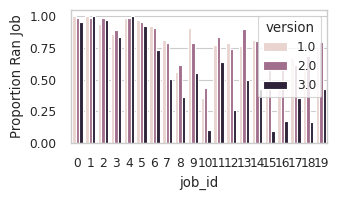

In [38]:
grouped = melted[melted["could_run"] == True].groupby(["job_id", "version"])["run"].value_counts(normalize=True).unstack().reset_index()
fig, ax = plt.subplots(1,1)
sns.barplot(data=grouped, x="job_id", y=True, hue="version", ax=ax)
ax.set_ylabel("Proportion Ran Job")
# sns.countplot(data=melted, x="job_id", hue="version")

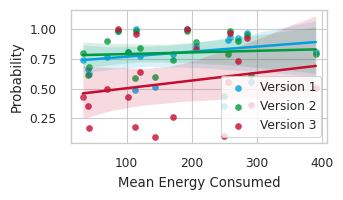

In [39]:
grouped = melted[melted["could_run"] == True].groupby(["job_id", "version"])[["run", "energy"]].agg({"run": ["sum", len], "energy": "mean"}).reset_index()
grouped.columns = ["job_id", "version", "run", "could_run", "energy"]
grouped["prop_ran"] = grouped["run"] / grouped["could_run"]
grouped["energy"] = grouped.groupby(["job_id"])["energy"].transform("mean")

fig, ax = plt.subplots(1,1)
sns.regplot(data=grouped[grouped["version"] == 1], x="energy", y="prop_ran", color=colors[0], label="Version 1", robust=True, ax=ax)
sns.regplot(data=grouped[grouped["version"] == 2], x="energy", y="prop_ran", color=colors[1], label="Version 2", robust=True, ax=ax)
sns.regplot(data=grouped[grouped["version"] == 3], x="energy", y="prop_ran", color=colors[2], label="Version 3", robust=True, ax=ax)
# sns.scatterplot(grouped, x="energy", y="prop_ran", hue="version", ax=ax)
# ax.get_legend().remove()
plt.legend(loc="lower right")
ax.set_ylabel("Probability")
ax.set_xlabel("Mean Energy Consumed")
plt.savefig("figures/game_job_probability_by_energy.pdf")
# plt.savefig("figures/game_job_probability_by_energy_talk.png")

/tmp/ipykernel_646/2123423521.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(grouped, x="priority", y="prop_ran", hue="version", hue_order=[1, 2, 3], palette=colors, errorbar=None)


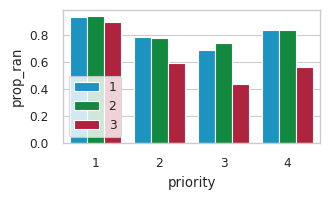

In [40]:
priority_map = {"low": 1, "medium": 2, "high": 3, "very high": 4}
grouped["priority"] = grouped["job_id"].map({i: priority_map[job["importance"]] for i, job in enumerate(jobs)})

fig, ax = plt.subplots(1,1)
sns.barplot(grouped, x="priority", y="prop_ran", hue="version", hue_order=[1, 2, 3], palette=colors, errorbar=None)
# sns.regplot(data=grouped[grouped["version"] == 1], x="priority", y="prop_ran", color=colors[0], label="Version 1", robust=True, ax=ax)
# sns.regplot(data=grouped[grouped["version"] == 2], x="priority", y="prop_ran", color=colors[1], label="Version 2", robust=True, ax=ax)
# sns.regplot(data=grouped[grouped["version"] == 3], x="priority", y="prop_ran", color=colors[2], label="Version 3", robust=True, ax=ax)
# # sns.scatterplot(grouped, x="energy", y="prop_ran", hue="version", ax=ax)
# # ax.get_legend().remove()
plt.legend(loc="lower left")
# ax.set_ylabel("Probability")
# ax.set_xlabel("Job Priority")
# plt.savefig("figures/game_job_probability_by_energy.pdf")
# plt.savefig("figures/game_job_probability_by_energy_talk.png")

/tmp/ipykernel_646/702893150.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  fig = sns.barplot(melted, x="job_id", y="energy", hue="version_", hue_order=["Version 1", "Version 2", "Version 3"], palette=colors, errorbar=None)


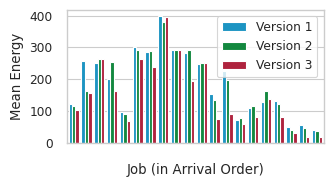

In [45]:
fig, ax = plt.subplots(1,1)
melted["version_"]  = melted["version"].map({1: "Version 1", 2: "Version 2", 3: "Version 3"})
fig = sns.barplot(melted, x="job_id", y="energy", hue="version_", hue_order=["Version 1", "Version 2", "Version 3"], palette=colors, errorbar=None)
ax.get_legend().set_title(None)
ax.set_xticklabels([])
ax.set_xlabel("Job (in Arrival Order)")
ax.set_ylabel("Mean Energy")
plt.savefig("figures/game_energy_by_job.pdf")
plt.savefig("figures/game_energy_by_job_talk.png")

# 